### Investigate number_of_learners > 40 outliers

#### Problem:
number_of_learners is normally distributed with a large number
of outliers over 40

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [2]:
dfRaw = load_df('dfRaw')

#### Display histogram

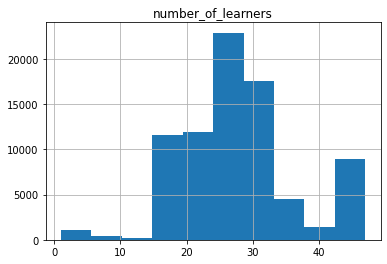

In [3]:
out = dfRaw.select('number_of_learners').toPandas().hist()

- Just under 10,000 over 40 learners

#### Compare calculated to actual

In [ ]:
# Calculate number of learners
dfPd = dfRaw.groupBy('assessment_instance_id', 'number_of_learners').agg(
F.countDistinct('learner_id').alias('number_of_learners_calc')
).toPandas()

dfPd[['number_of_learners', 'number_of_learners_calc']].describe()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

dfPd['number_of_learners'].hist(ax=ax1)
ax1.set_title('number_of_learners')

dfPd['number_of_learners_calc'].hist(ax=ax2)
ax2.set_title('number_of_learners_calc')

plt.suptitle('Actual vs Calculated By assessment_instance_id')

plt.show()


In [4]:
overDf = dfRaw.filter(F.col('number_of_learners') > 40)

#### Display number of observations

In [5]:
overDf.count()

9473

- 9,473 observations

- Not issolated to a org, section, learnes, or assessments

###### Display single values

In [12]:
cols = single_val(overDf.toPandas())
display_sv_cols(overDf, cols)

,0
assignment_max_attempts,1
assignment_late_submission,False
assignment_attempt_number,1
learner_attempt_status,fully scored
is_deleted,False


- No values other than expected

###### Check date values

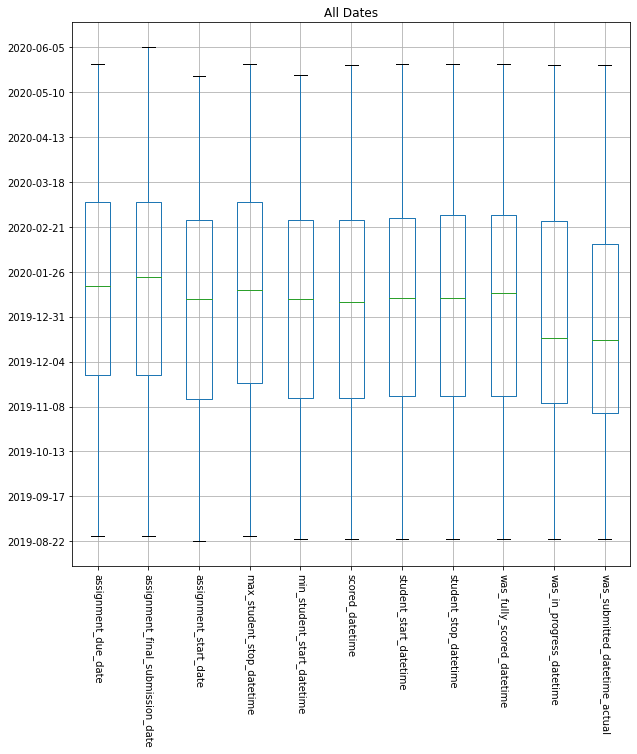

In [17]:
types = get_var_types()

# Sample of all dates
pdDf = dfRaw.sample(False, .01, 8764664).select(* (F.unix_timestamp(c).alias(c) for c in types['intervalVars']) ).toPandas()
date_boxplot(pdDf, "All Dates")

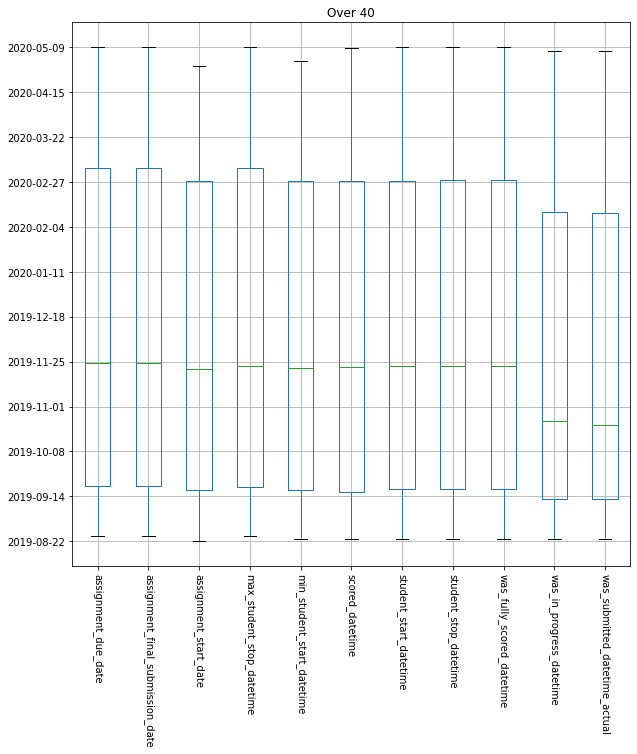

In [18]:
# Only over 40 dates
dfPd = overDf.select(* (F.unix_timestamp(c).alias(c) for c in types['intervalVars']) ).toPandas()
date_boxplot(dfPd, "Over 40")

- Mean about 1.5 months lower
- Q1 to Q3 range wider

###### Categorical / Nominal Correlations Heatmap

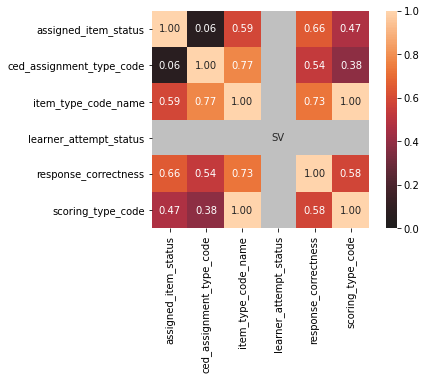

In [19]:
corr, ax = associations( dfRaw.select(*types['nominalVars']).toPandas(), nan_replace_value='null' )

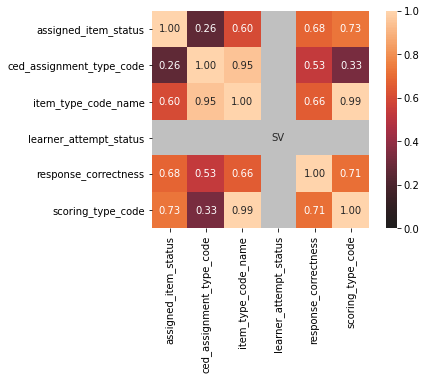

In [20]:
corr, ax = associations( overDf.select(*types['nominalVars']).toPandas(), nan_replace_value='null' )

In [39]:
cats = get_var_cats()
pdDf = overDf.select('section_id').distinct().toPandas()
overSections = pdDf['section_id'].tolist()

In [ ]:
pd.set_option('display.max_rows', 3800)

dfRaw.where(dfRaw.section_id.isin(overSections)).select('section_id', 'learner_id', 'assessment_id', 'number_of_learners').distinct().orderBy('section_id','learner_id', 'assessment_id', 'number_of_learners').toPandas()

In [ ]:
pd.set_option('display.max_rows', 3800)

overDf.where(overDf.section_id.isin(overSections)).select('section_id', 'learner_id', 'assessment_id', 'number_of_learners').distinct().orderBy('section_id','learner_id', 'assessment_id', 'number_of_learners').toPandas()

In [49]:
overDf.where(overDf.section_id.isin(overSections)).select('assessment_instance_attempt_id', 'number_of_learners').distinct().orderBy( 'assessment_instance_attempt_id', 'number_of_learners').toPandas()

,assessment_instance_attempt_id,number_of_learners
0,NaN,46
1,1098164.0,45
2,1098341.0,45
3,1098366.0,45
4,1098387.0,44
5,1098448.0,46
6,1098470.0,46
7,1098471.0,46
8,1098473.0,46
9,1098482.0,45
